In [1]:
# ls

In [2]:
# path='test1.xlsx'

In [3]:
import pandas as pd

In [4]:
# kind_sheet=pd.read_excel(path,'K（物料）')
# kind_sheet.columns=['A','B','C','D','E','F','G','H','I','J','K']

In [5]:
# kind_sheet.head(10)

In [6]:
# kind_sheet=pd.read_csv('龙钢运输量表_final.csv')

In [79]:
# path='龙钢运输量表_final-修改(1).xlsx'
path='日照钢铁物料运输量表_new.xlsx'
kind_sheet=pd.read_excel(path)

In [80]:
#raw
kind_sheet.head()

,流转类型,运输方式,来源单元,到达单元,物质名称,物质量,日运输量,重车起点,重车终点,空车起点,空车终点,运输车辆的最大装载量,车次,日运输量新,车辆折算系数
0,回收物流,道路,炼钢1,废钢堆场_1,钢水罐铸余及事故钢水,9.37,0.026771,29,16.0,16.0,29,47,NaN,NaN,4.062712
1,回收物流,道路,炼钢1,废钢堆场_1,连铸切头切尾,4.68,0.013371,29,16.0,16.0,29,47,NaN,NaN,4.062712
2,回收物流,道路,炼钢1,废钢堆场_1,废连铸坯及试样,2.60,0.007429,29,16.0,16.0,29,22,NaN,NaN,1.901695
3,回收物流,道路,炼钢1,废钢堆场_1,连铸废旧备件,1.33,0.003800,29,16.0,16.0,29,33,NaN,NaN,2.852542
4,回收物流,道路,炼钢1,原料厂1,炼钢集尘粉,20.82,0.059486,29,18.0,18.0,29,12,NaN,NaN,1.037288


In [81]:
kind_sheet['日运输量']=kind_sheet['物质量']/350*10000

In [82]:
#车辆折算系数 所有大于14t的车都是3.0; 小于14t的  按照2.0计算
def p(row):
    if row['运输车辆的最大装载量']>=14:
        return 3
    else:
        return 2
        


kind_sheet['车辆折算系数']=kind_sheet.apply(lambda row:p(row),axis=1)

In [83]:
# kind_sheet['运输车辆的最大装载量'].value_counts()

In [84]:
import math

In [85]:
kind_sheet.shape

(64, 15)

In [86]:
kind_sheet['车次']=kind_sheet['日运输量']*1.1/kind_sheet['运输车辆的最大装载量']
kind_sheet['车次']=kind_sheet['车次'].apply(lambda x:math.ceil(x))

In [97]:
kind_sheet['车次'].sum()

2362

In [88]:
# kind_sheet['车次'].sum()

In [89]:
kind_sheet.drop(columns=['日运输量新'],axis=1,inplace=True)

In [90]:
kind_sheet=kind_sheet.sort_values(by='物质量',ascending=False)

In [171]:
kind_sheet=kind_sheet[(kind_sheet['重车终点'].notnull())&(kind_sheet['重车终点']<35)]

In [172]:
kind_sheet.shape

(54, 14)

In [173]:
kind_sheet.head(20)

,流转类型,运输方式,来源单元,到达单元,物质名称,物质量,日运输量,重车起点,重车终点,空车起点,空车终点,运输车辆的最大装载量,车次,车辆折算系数
36,铁前物流,道路,工业站,原料厂1,石灰石,575.78,16450.857143,16,33.0,33.0,16,32,566,3
6,回收物流,道路,炼钢1,铁钢渣处理_1,转炉渣,114.19,3262.571429,29,24.0,24.0,29,13,277,2
58,回收物流,道路,炼钢3,铁钢渣处理_1,转炉渣,90.08,2573.714286,1,24.0,24.0,1,38,75,3
39,回收物流,道路,炼铁2,原料厂1,高炉除尘灰,58.41,1668.857143,5,18.0,18.0,5,36,51,3
45,回收物流,道路,炼铁1,原料厂1,高炉除尘灰,54.99,1571.142857,3,18.0,18.0,3,39,45,3
40,回收物流,道路,炼铁2,原料厂1,返焦,44.60,1274.285714,5,18.0,18.0,5,36,39,3
46,回收物流,道路,炼铁1,原料厂1,返焦,41.99,1199.714286,3,18.0,18.0,3,44,30,3
7,回收物流,道路,炼钢1,铁钢渣处理_1,精炼渣,41.64,1189.714286,29,24.0,24.0,29,17,77,3
41,回收物流,道路,炼铁2,原料厂1,块矿返矿,36.81,1051.714286,5,18.0,18.0,5,24,49,3
38,回收物流,道路,煤净_1,原料厂1,脱水污泥,34.94,998.285714,11,18.0,18.0,11,15,74,3


In [174]:
kind_sheet.tail(20)

,流转类型,运输方式,来源单元,到达单元,物质名称,物质量,日运输量,重车起点,重车终点,空车起点,空车终点,运输车辆的最大装载量,车次,车辆折算系数
44,回收物流,道路,炼铁2,铁钢渣处理_1,残渣铁,4.78,136.571429,5,24.0,24.0,5,40,4,3
1,回收物流,道路,炼钢1,废钢堆场_1,连铸切头切尾,4.68,133.714286,29,16.0,16.0,29,47,4,3
11,回收物流,道路,炼钢1,铁钢渣处理_1,氧化铁皮、切割渣,4.68,133.714286,29,24.0,24.0,29,28,6,3
50,回收物流,道路,炼铁1,铁钢渣处理_1,残渣铁,4.50,128.571429,3,24.0,24.0,3,26,6,3
21,回收物流,道路,炼钢2,铁钢渣处理_1,脱硫渣,4.16,118.857143,27,24.0,24.0,27,46,3,3
12,回收物流,道路,炼钢1,铁钢渣处理_1,钢屑,3.75,107.142857,29,24.0,24.0,29,48,3,3
16,回收物流,道路,炼钢2,原料厂1,OG泥,3.75,107.142857,27,18.0,18.0,27,37,4,3
53,回收物流,道路,炼钢3,废钢堆场_1,连铸切头切尾,3.68,105.142857,1,16.0,16.0,1,19,7,3
63,回收物流,道路,炼钢3,铁钢渣处理_1,氧化铁皮、切割渣,3.68,105.142857,1,24.0,24.0,1,17,7,3
22,回收物流,道路,炼钢2,铁钢渣处理_1,炼钢残钢,3.61,103.142857,27,24.0,24.0,27,23,5,3


In [175]:
# kind=kind_sheet['A'][1:]
o1=kind_sheet['重车起点']
d1=kind_sheet['重车终点']
o2=kind_sheet['空车起点']
d2=kind_sheet['空车终点']
# c1=kind_sheet['H'][1:]
# c2=kind_sheet['I'][1:]
E=kind_sheet['车辆折算系数']
# Q=kind_sheet['日运输量新']

Q=kind_sheet['日运输量']
cap=kind_sheet['运输车辆的最大装载量']

In [176]:
# kind=kind_sheet['A'][1:]
# o1=kind_sheet['C'][1:]
# d1=kind_sheet['D'][1:]
# o2=kind_sheet['J'][1:]
# d2=kind_sheet['K'][1:]
# c1=kind_sheet['H'][1:]
# c2=kind_sheet['I'][1:]
# E=kind_sheet['G'][1:]
# Q=kind_sheet['E'][1:]
# cap=kind_sheet['F'][1:]

In [177]:
Q.head()

36    16450.857143
6      3262.571429
58     2573.714286
39     1668.857143
45     1571.142857
Name: 日运输量, dtype: float64

In [178]:
#暂时设定为10车次
# kind_sheet['车次']=3

In [179]:
Amounts1=kind_sheet['车次']
Amounts2=kind_sheet['车次']

In [180]:
Amounts1.head()

36    566
6     277
58     75
39     51
45     45
Name: 车次, dtype: int64

In [181]:
# type(o1)

In [182]:
# kind


In [183]:
ls

 Volume in drive E is 学校资料资源教学
 Volume Serial Number is 5ADC-AF84

 Directory of E:\tsl_file\python_project\gene

2020/04/23  11:13    <DIR>          .
2020/04/23  11:13    <DIR>          ..
2020/04/23  10:47    <DIR>          .idea
2020/04/17  16:37    <DIR>          .ipynb_checkpoints
2020/03/18  10:58           712,932 1.总览.pdf
2020/03/18  11:24           281,284 2.数据结构.pdf
2020/03/18  16:18           915,928 3.快速入门.pdf
2020/03/18  13:32         1,025,649 4.进化算法模板.pdf
2020/03/24  17:03           479,811 5.多染色体混合编码.pdf
2020/03/24  17:08           231,949 6.多种群进化优化.pdf
2020/03/26  11:27            28,592 all_2018.xlsx
2020/04/01  20:39            14,233 distance.csv
2020/04/23  10:49             1,804 distance1.csv
2020/04/07  10:44            14,121 FD.csv
2020/04/23  10:49             1,542 FD1.csv
2020/04/07  10:44            14,121 FF.csv
2020/04/23  10:49             1,542 FF1.csv
2020/04/08  15:28            14,259 FHV.csv
2020/04/23  10:49             1,630 FHV1.csv
2020/04/07 

In [184]:
# l=pd.read_csv('distance.csv',header=None) #读取各个路段长度
# # a=pd.read_csv('A（可达矩阵）') #读取各路段间的可达矩阵（此处应当按照物料品类进行分类，案列假设7种物料可达矩阵一致）
# MSF=pd.read_csv('MSF.csv',header=None)#,'B2:K11');#读取路段的最大服务交通量
# FHV=pd.read_csv('FHV.csv',header=None)#,'B2:K11');#读取交通组成修正系数
# FD=pd.read_csv('FD.csv',header=None)#,'B2:K11');  #读取方向分布修正系数
# FW=pd.read_csv('FW.csv',header=None)#,'B2:K11');  #读取车道宽度、路肩宽度修正系数
# FF=pd.read_csv('FF.csv',header=None)#,'B2:K11');  #读取路测干扰修正系数


l=pd.read_csv('distance1.csv',header=None) #读取各个路段长度
# a=pd.read_csv('A（可达矩阵）') #读取各路段间的可达矩阵（此处应当按照物料品类进行分类，案列假设7种物料可达矩阵一致）
MSF=pd.read_csv('MSF1.csv',header=None)#,'B2:K11');#读取路段的最大服务交通量
FHV=pd.read_csv('FHV1.csv',header=None)#,'B2:K11');#读取交通组成修正系数
FD=pd.read_csv('FD1.csv',header=None)#,'B2:K11');  #读取方向分布修正系数
FW=pd.read_csv('FW1.csv',header=None)#,'B2:K11');  #读取车道宽度、路肩宽度修正系数
FF=pd.read_csv('FF1.csv',header=None)#,'B2:K11');  #读取路测干扰修正系数

In [185]:
#道路路段：单项双车道,双向四车道
#将节点列表转为各个路段（双向）
single_double_lane={'road1':[25,26,27],'road2':[17,28,29,30,31,32]}
def get_all_double_lane(single_double_lane):
    double_lanes=set()
    for road ,path in single_double_lane.items():
        for path_pair in zip(path,path[1:]):
            double_lanes.add(path_pair)
            double_lanes.add((path_pair[1],path_pair[0]))
            print(path_pair)
    return double_lanes
        
    
double_lanes=get_all_double_lane(single_double_lane)    
double_lanes

(25, 26)
(26, 27)
(17, 28)
(28, 29)
(29, 30)
(30, 31)
(31, 32)


{(17, 28),
 (25, 26),
 (26, 25),
 (26, 27),
 (27, 26),
 (28, 17),
 (28, 29),
 (29, 28),
 (29, 30),
 (30, 29),
 (30, 31),
 (31, 30),
 (31, 32),
 (32, 31)}

In [186]:
# ##禁止重车或空车通行的路段，默认为所有车次
# forbidden_paths={'material_type_index':0,'car_times':None,'forbidden_roads':[14,27]}



In [187]:
# forbidden_paths.get('material_type_index0',False)

In [188]:
FW[FW==1]=0.84

In [189]:
# 道路宽度6m,0.52;7.5 ,0.56;9m,0.84;
# 10.5m 修正系数取值1   宽度12.5m 取值1.16   14.5m取值1.32  大于16.5 取值1.48   双车道情况下 ；
w={6:0.53,7.5:0.86,9:0.84,10.5:1,12.5:1.16,14.5:1.32,16.5:1.48}

path_w={(5,6):12,(6,5):12,(24,14):14.5,(14,15):14.5,(15,16):14.5,(14, 24): 14.5, (15, 14): 14.5, (16, 15): 14.5 }

def process_w(ew):
    if (ew>=6) & (ew<7.5):
        return  0.53
    elif (ew>=7.5) &( ew <9) :
        return 0.86
    elif (ew>=9) & (ew < 10.5):
        return 0.84
    elif (ew>=10.5) &( ew <12.5) :
        return 1
    elif (ew>=12.5) & (ew <14.5) :
        return 1.16
    elif (ew>=14.5) & (ew < 16.5):
        return 1.32
    elif (ew>= 16.5):
        return 1.48
    else:
        return 0.84
    


In [190]:
for ep,ew in path_w.items():
    ep_index=(ep[0]-1,ep[1]-1)
    FW.iloc[ep_index]=process_w(ew)
    

In [191]:
FW.iloc[(14,15)]

1.32

In [192]:
FW.head(10)

,0,1,2,3,4,5,6,7,8,9,...,24,25,26,27,28,29,30,31,32,33
0,NaN,0.84,0.84,NaN,NaN,0.84,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.84,NaN,NaN,0.84,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.84,NaN,NaN,NaN,0.84,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,0.84,NaN,NaN,NaN,0.84,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,0.84,NaN,NaN,1.00,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,0.84,NaN,NaN,0.84,1.00,NaN,NaN,NaN,0.84,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.84,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,0.84,NaN,0.84,NaN,0.84,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.84,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [193]:
# t={(24,14):14.5,(14,15):14.5,(15,16):14.5}
# t2={(k[1],k[0]):v for k,v in t.items()}
# t2

In [194]:
FW.head()

,0,1,2,3,4,5,6,7,8,9,...,24,25,26,27,28,29,30,31,32,33
0,NaN,0.84,0.84,NaN,NaN,0.84,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.84,NaN,NaN,0.84,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.84,NaN,NaN,NaN,0.84,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,0.84,NaN,NaN,NaN,0.84,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,0.84,NaN,NaN,1.00,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [195]:
l.head()

,0,1,2,3,4,5,6,7,8,9,...,24,25,26,27,28,29,30,31,32,33
0,NaN,1003.669,560.926,NaN,NaN,393.475,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1003.669,NaN,NaN,385.485,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,560.926,NaN,NaN,NaN,378.977,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,385.485,NaN,NaN,NaN,992.626,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,378.977,NaN,NaN,341.379,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [196]:
MSF.head()

,0,1,2,3,4,5,6,7,8,9,...,24,25,26,27,28,29,30,31,32,33
0,-2147483648,420,420,-2147483648,-2147483648,420,-2147483648,-2147483648,-2147483648,-2147483648,...,-2147483648,-2147483648,-2147483648,-2147483648,-2147483648,-2147483648,-2147483648,-2147483648,-2147483648,-2147483648
1,420,-2147483648,-2147483648,420,-2147483648,-2147483648,-2147483648,-2147483648,-2147483648,-2147483648,...,-2147483648,-2147483648,-2147483648,-2147483648,-2147483648,-2147483648,-2147483648,-2147483648,-2147483648,-2147483648
2,420,-2147483648,-2147483648,-2147483648,420,-2147483648,-2147483648,-2147483648,-2147483648,-2147483648,...,-2147483648,-2147483648,-2147483648,-2147483648,-2147483648,-2147483648,-2147483648,-2147483648,-2147483648,-2147483648
3,-2147483648,420,-2147483648,-2147483648,-2147483648,420,-2147483648,-2147483648,-2147483648,-2147483648,...,-2147483648,-2147483648,-2147483648,-2147483648,-2147483648,-2147483648,-2147483648,-2147483648,-2147483648,-2147483648
4,-2147483648,-2147483648,420,-2147483648,-2147483648,420,-2147483648,-2147483648,-2147483648,-2147483648,...,-2147483648,-2147483648,-2147483648,-2147483648,-2147483648,-2147483648,-2147483648,-2147483648,-2147483648,-2147483648


In [197]:
FHV.head()

,0,1,2,3,4,5,6,7,8,9,...,24,25,26,27,28,29,30,31,32,33
0,NaN,0.333,0.333,NaN,NaN,0.333,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.333,NaN,NaN,0.333,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.333,NaN,NaN,NaN,0.333,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,0.333,NaN,NaN,NaN,0.333,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,0.333,NaN,NaN,0.333,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [198]:
ot=pd.DataFrame(o1.values.tolist())
dt=pd.DataFrame(d1.values.tolist())

In [199]:
ot.head()

,0
0,16
1,29
2,1
3,5
4,3


In [200]:
dt.head()

,0
0,33.0
1,24.0
2,24.0
3,18.0
4,18.0


In [201]:
type(dt)

pandas.core.frame.DataFrame

In [202]:
type(dt.iloc[:,0])

pandas.core.series.Series

In [203]:
FF.head(20)

,0,1,2,3,4,5,6,7,8,9,...,24,25,26,27,28,29,30,31,32,33
0,NaN,0.95,0.95,NaN,NaN,0.95,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.95,NaN,NaN,0.95,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.95,NaN,NaN,NaN,0.95,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,0.95,NaN,NaN,NaN,0.95,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,0.95,NaN,NaN,0.95,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,0.95,NaN,NaN,0.95,0.95,NaN,NaN,NaN,0.95,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.95,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,0.95,NaN,0.95,NaN,0.95,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.95,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [204]:
# l=pd.read_excel(path,'L（路段长）').iloc[:,1:]#,'B2:K11');  #读取各个路段长度
# a=pd.read_excel(path,'A（可达矩阵）').iloc[:,1:]#,'B2:K11');  #读取各路段间的可达矩阵（此处应当按照物料品类进行分类，案列假设7种物料可达矩阵一致）
# MSF=pd.read_excel(path,'MSF（最大服务交通量）').iloc[:,1:]#,'B2:K11');#读取路段的最大服务交通量
# FHV=pd.read_excel(path,'FHV（交通组成修正系数）').iloc[:,1:]#,'B2:K11');#读取交通组成修正系数
# FD=pd.read_excel(path,'FD（方向分布系数）').iloc[:,1:]#,'B2:K11');  #读取方向分布修正系数
# FW=pd.read_excel(path,'FW（宽度修正系数）').iloc[:,1:]#,'B2:K11');  #读取车道宽度、路肩宽度修正系数
# FF=pd.read_excel(path,'FF（路测干扰系数）').iloc[:,1:]#,'B2:K11');  #读取路测干扰修正系数

# o1=pd.read_excel(path,'K（物料）','C3:C9');  #读取重车起点
# d1=pd.read_excel(path,'K（物料）','D3:D9');  #读取重车终点
# o2=pd.read_excel(path,'K（物料）','J3:J9');  #读取空车起点
# d2=pd.read_excel(path,'K（物料）','K3:K9');  #读取空车终点
# c1=pd.read_excel(path,'K（物料）','H3:H9');  #读取重车成本
# c2=pd.read_excel(path,'K（物料）','I3:I9');  #读取空车成本
# E=pd.read_excel(path,'K（物料）','G3:G9');     #读取运输物料k的车辆的折算系数
# Q=pd.read_excel(path,'K（物料）','E3:E9');     #读取物料k运输量的集合
# cap=pd.read_excel(path,'K（物料）','F3:F9');   #读取运载物料k的车辆的最大装载量
# alpha=0.8; 


In [205]:
# c2.head(10)

In [206]:
l.head()

,0,1,2,3,4,5,6,7,8,9,...,24,25,26,27,28,29,30,31,32,33
0,NaN,1003.669,560.926,NaN,NaN,393.475,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1003.669,NaN,NaN,385.485,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,560.926,NaN,NaN,NaN,378.977,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,385.485,NaN,NaN,NaN,992.626,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,378.977,NaN,NaN,341.379,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [207]:
n=l.shape[0]
m=kind_sheet.shape[0]

In [208]:
n

34

In [209]:
m

54

In [210]:
E.head(20)

36    3
6     2
58    3
39    3
45    3
40    3
46    3
7     3
41    3
38    3
47    3
25    3
59    3
17    2
4     2
31    3
56    3
8     2
26    3
42    3
Name: 车辆折算系数, dtype: int64

In [211]:
import networkx as nx
from matplotlib import pyplot as plt
import numpy as np

In [212]:
##用最新程序运行

生成一个空的有向图
为这个网络添加节点...


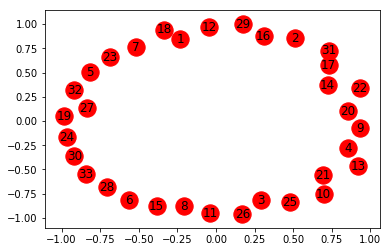

在网络中添加带权中的边...


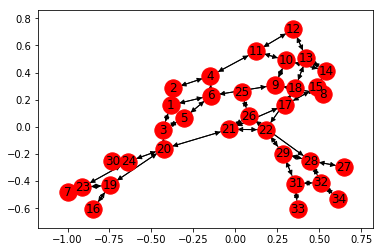

给网路设置布局...
画出网络图像：


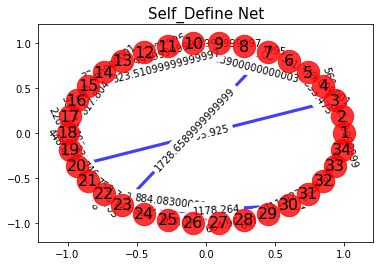

In [213]:
import math
# all_paths={}
# all_delete_edges=set()


print('生成一个空的有向图')
G=nx.DiGraph()
print('为这个网络添加节点...')
for i in range(1,l.shape[0]):
    G.add_node(i)

nx.draw_networkx(G)
plt.show()
    
print('在网络中添加带权中的边...')
for r in range(l.shape[0]):
    for c in range(l.shape[1]):
        if l.iloc[r,c]>0:
            G.add_weighted_edges_from([(r+1,c+1,l.iloc[r,c])])

            
nx.draw_networkx(G)
plt.show()
        


print('给网路设置布局...')
pos=nx.shell_layout(G)


#把节点画出来  
nx.draw_networkx_nodes(G,pos,node_color='r',node_size=500,alpha=0.8) #显示每一个结点 
  
#把边画出来  
nx.draw_networkx_edges(G,pos,width=3.0,alpha=0.5,edge_color='b')  #显示每一条边
  
#把节点的标签画出来  
nx.draw_networkx_labels(G,pos,font_size=16)     #显示每一个结点上的数字


print('画出网络图像：')
# nx.draw(G,pos,with_labels=True, node_color='white', edge_color='red', node_size=400, alpha=0.5 )


#把边权重画出来  
edge_labels = nx.get_edge_attributes(G,'weight')    #获取每一条边的权重
nx.draw_networkx_edge_labels(G, pos, edge_labels)   #为图添加上权重

plt.title('Self_Define Net',fontsize=15)
plt.show()



In [214]:
alpha=0.8
#用下面的代替车辆行驶100次
# alpha=0.08

In [215]:
##起点，必经点集合（默认走第一个点，饱和之后顺次走下一个点），终点；index是物料类型

##物料0，必经点24，汽车衡720重卡每天（空车需要转为重车进行计算么？还是只计算重车，如果空车经过该汽车衡）


###禁止点集合：某类物料禁止经过该

In [216]:
# 物料号，车次，禁止的路段;默认所有车次（）
forbidden_paths={ 0:[  None,  (17, 21)]}
# {'material_type_index': 0, 'car_times': None, 'forbidden_roads': [14, 27]}
material_info=forbidden_paths.get(0,False)
material_info[1]



##单向通行和禁止重车通行（有物料种类无关）
#单向通行，一开始就告诉哪些路段是单项通行的：告诉单向路径如1-2-3-4-5；初始化网络时完成
#禁止重车通行（双向），后面需要判断是否为重车，是重车就断开，重车行驶完毕再连接上；动态变化




(17, 21)

In [217]:
a=[1,2,3,4]
a.reverse()
a

[4, 3, 2, 1]

In [218]:
#必经点汽车衡约束
# 物料号，车次，必须经过的节点
##真实情况可能是多种物料经过多个汽车衡（多对多的关系，例如原料（物质1，物质2，物质3），可以经过汽车衡1、汽车衡2、汽车衡3（依次）），
# 如果某个汽车衡超标，就要自动选择一个可用的汽车衡还是怎么做（目前自动提示，已达到数量，然后提建议）？？？？
##采样点情况也一样

must_pass_nodes={0:[None,7,'truck_scale_nodes'],1:[None,7,'truck_scale_nodes']}#物料对应必经点信息
# must_passed_nodes_info={35:'truck_scale_nodes_index',24:'sample_nodes_index'}#

In [219]:
# G.add_edge(*(14, 27))

In [220]:
def get_shortest_path(index,car_times,start_end_tuple,car_type):   
    

    
#     for index,( s ,e) in enumerate(start_end_tuple_list):
#     print('start_end_tuple',type(start_end_tuple))
    if (start_end_tuple not in all_paths) or ( set(all_paths.get(start_end_tuple,(None,None)))&all_delete_edges):
        s,e=start_end_tuple

        all_shortest_path=list(nx.all_shortest_paths(G,s,e,'weight'))
        #最短路径有多条时，选择节点数最少的那个最短路径
        if len( all_shortest_path)>1:
            len_min_index=np.argmin([len(each)for each in all_shortest_path])
            all_shortest_path_use=all_shortest_path[len_min_index]
        else:
            all_shortest_path_use=all_shortest_path[0]
        all_heavy_path['{}{}'.format(car_type,index+1)]=all_shortest_path_use

#         print('路径号{},车次{}，{}{} 源节点{}，终点为{},最短路径为：{}'.format(index,car_times,car_type,index+1,s,e,all_shortest_path_use))
        distance=nx.shortest_path_length(G,s,e,'weight')


#         print('路径号{},车次{},{}{}源节点为{}，终点为{},最短距离：{}'.format(index,car_times,car_type,index+1,s,e, distance))
        pairs_list=list(zip(all_shortest_path_use,all_shortest_path_use[1:]))
#         print('pairs_list={}\n'.format(pairs_list))
    
        all_paths[start_end_tuple]=pairs_list
        all_distance[start_end_tuple]=distance
#         all_paths[start_end_tuple].append(pairs_list)
    else:
        pairs_list=all_paths[start_end_tuple]
        distance=all_distance[start_end_tuple]
#         print('已经存在的最短路径为：路径号{},车次{},{},{}'.format(index,car_times,start_end_tuple,pairs_list))

#     G.add_edge(*material_info[1])
    return  index,car_times,start_end_tuple,car_type,pairs_list,distance

In [221]:
def judge_conditions(index,car_times,start_end_tuple,car_type,pairs_list,distance):   
    success=1#0是失败，1是成功
    res_temp_list=[]
    '''
    1.全部满足时，全部更新路段限制条件，并且返回最短路径和最短距离
    2.当某个路段不满足条件时，返回pair_index对应的路段，临时删除该路段，调用最短路径算法重新执行，然后在判断，直到全部满足条件或者无解时结束
    #重车时删除的路段先不恢复，等到空车时在将删除的路段恢复（相当于重新构建一次网络图，然后安装之前的策略进行），重新运行
    
    
    '''
    
    ##计算每个路段道路通行能力
    ##第一辆车拉着第一种货物一次经过第一个、二个、等各个节点
    e0=E.iloc[index]
    q0=Q.iloc[index]
    c0=cap.iloc[index]
    q_div_c=q0/c0
#     op=e0*math.ceil(q_div_c)
    op=e0
#     ##将重车转为标车
#     if op=='heavy':
# #         print('重车{},{},{}乘以1.5转为标车'.format(index,car_times,car_type))
#         op=op*1.5
# #     print('op',op)

    
#     print('约束最短路径为：',pairs_list)

    ##对于该路径中的所有路段，依次更新负荷值，全部路段满足要求时，该路径可以；
    #如果某个路段不满足要求，那么就要重新计算，并更新负荷值，直到满足要求为止。
    
    
    ###这个地方有问题，只有所有路段都满足通行要求时才能一次性更新，否则不能更新；只能重新计算最短路径然后在判断是否满足要求
    ###当然一个路段一个路段更新也是可以的，但是更新到最好必须是有解的，要是没有解的话得重新计算整条路径或者其它处理方法
    
    ##先假设都能有可行解，后面的待会考虑
    
    
    ##删除路段后也是重新计算最短路，所以还是一条路径满足所有条件时，然后才返回
#     print('预选路径号{},车次{}，{}{} 源节点{}，终点为{},最短路径为：{}'.format(index,car_times,car_type,index+1,start_end_tuple[0],start_end_tuple[1],pairs_list))
    for pair in pairs_list:
        ##已经使用的路段都是满足道路通行能力的   
        pair_index=tuple((int(each)-1 for each in pair))
        
        ##每个路段24小时实际通行能力（车辆数）
        real_amounts=(MSF.iloc[pair_index]*FHV.iloc[pair_index]*FD.iloc[pair_index]*FW.iloc[pair_index]*FF.iloc[pair_index]*24)
        if pair in double_lanes:
#              print('路段{}是单项双车道，乘以1.85'.format(pair))
             real_amounts= real_amounts*1.85
            
        
        
        res_temp= op/real_amounts
        
        
#         print('res_temp={},MSF={},FHV.iloc[pair_index]={},FD.iloc[pair_index]={},FW.iloc[pair_index]={},FF.iloc[pair_index]={}'.format(
#             MSF.iloc[pair_index]*FHV.iloc[pair_index]*FD.iloc[pair_index]*FW.iloc[pair_index]*FF.iloc[pair_index],
#             MSF.iloc[pair_index],
#             FHV.iloc[pair_index],
#             FD.iloc[pair_index],
#             FW.iloc[pair_index],
#             FF.iloc[pair_index]
            
            
            
#             ))
        
        res_temp_list.append(res_temp)
        
        ##可能第一个路段就大于alpha也可能是后面的路段才大于等于alpha
        
#         if res[pair_index]+res_temp<alpha:
        ##这里道路通行能力是双向的：即是整个道路而不是道路上某个方向的车道
        pair_index_invert=tuple((pair_index[1],pair_index[0]))
        if res[pair_index]+res[pair_index_invert]+res_temp<alpha:
            pass
# #             print('res_temp={},pair_res={},pair_index={}'.format(res_temp,res[pair_index],pair_index))
#             res[pair_index]+=res_temp
# #             print('当前最短路径为:pairs_list',pairs_list)
        
#             if pair not in all_pairs_index_new.keys():
#                 all_pairs_index_new[pair]={}
#                 if car_type not in all_pairs_index_new[pair].keys():
#                     all_pairs_index_new[pair][car_type]=[]
#                     all_pairs_index_new[pair][car_type].append(index+1)
#                 else:
#                     all_pairs_index_new[pair][car_type].append(index+1)
                    
                    
#             else:   
#                 if car_type not in all_pairs_index_new[pair].keys():
#                     all_pairs_index_new[pair][car_type]=[]
#                     all_pairs_index_new[pair][car_type].append(index+1)
#                 else:
#                     all_pairs_index_new[pair][car_type].append(index+1)
        else:
            #暂时删除该有项边，重新找最短路径，找到最短路径后在将有向边加上
            print('删除该路段 {}'.format(pair))#暂时注释掉
#             print('res_temp={},pair_res={},pair_index={}\n'.format(res_temp,res[pair_index],pair_index))
            
#             if 
            
            G.remove_edge(*pair)
            all_delete_edges.add(pair)
            success=0
            
            break  
            
#             get_limited_shortest_path(index,start_end_tuple,car_type)
#             get_limited_shortest_path(index,car_times,start_end_tuple,car_type)
            
#             print('添加该路段 {}\n'.format(pair))
#             G.add_edge(*pair)
#             all_delete_edges.remove(pair)
    if success:
            #成功返回最短路径；并整体更新限制条件
            for pair ,res_temp in zip(pairs_list,res_temp_list):
                    pair_index=tuple((int(each)-1 for each in pair))
                    #单元出入口等不计算负荷率
#                     join_set=set(pair)&set(no_rate_nodes)
#                     if join_set:
#                         print('join_set',join_set)
                    if not set(pair)&set(no_rate_nodes):
                        res[pair_index]+=res_temp


                    if pair not in all_pairs_index_new.keys():
                            all_pairs_index_new[pair]={}
                            if car_type not in all_pairs_index_new[pair].keys():
                                all_pairs_index_new[pair][car_type]=[]
                                all_pairs_index_new[pair][car_type].append(index+1)
                            else:
                                all_pairs_index_new[pair][car_type].append(index+1)


                    else:   
                        if car_type not in all_pairs_index_new[pair].keys():
                            all_pairs_index_new[pair][car_type]=[]
                            all_pairs_index_new[pair][car_type].append(index+1)
                        else:
                            all_pairs_index_new[pair][car_type].append(index+1)

                
            return success, pairs_list,distance
    else:      
        #失败返回，失败的那个路段
        return success,pair ,None       
    

In [222]:
def get_limited_shortest_path(index,car_times,start_end_tuple,car_type): 
    
    
    index,car_times,start_end_tuple,car_type,pairs_list,distance=get_shortest_path(index,car_times,start_end_tuple,car_type)
    success,path,distance =judge_conditions(index,car_times,start_end_tuple,car_type,pairs_list,distance)
    
    ##删除某个路段之后，需要重新寻找最短路，即调用最短路径算法
    while True:
          try:
           
               if success:
                    break
               else:
                    index,car_times,start_end_tuple,car_type,pairs_list,distance=get_shortest_path(index,car_times,start_end_tuple,car_type)
                    success,path ,distance=judge_conditions(index,car_times,start_end_tuple,car_type,pairs_list,distance)
          except Exception as e:
            print('error 往后车次无解',e,start_end_tuple,)
            break
    ##获取该条满足条件的最短路径之后，恢复被删除的路径
     
#             all_delete_edges.remove(pair)
     
    all_delete_edges_copy=all_delete_edges.copy()
    for pair in all_delete_edges_copy:
#         print('pairssss',pair)
        G.add_edge(*pair)
        all_delete_edges.remove(pair)
    
    #清空删除的保存路径
#     global all_delete_edges

#     all_delete_edges=set()
        
                    
                    
    return path,distance
    

In [223]:
o1.head()

36    16
6     29
58     1
39     5
45     3
Name: 重车起点, dtype: int64

In [224]:
d1.head()

36    33.0
6     24.0
58    24.0
39    18.0
45    18.0
Name: 重车终点, dtype: float64

In [225]:
all_car_se={}
all_car_se['heavy']=list(zip(o1,d1,Amounts1))
all_car_se['light']=list(zip(o2,d2,Amounts2))


In [256]:
#生成网络图
import math
print('生成一个空的有向图')
G=nx.DiGraph()
print('为这个网络添加节点...')
for i in range(1,l.shape[0]):
    G.add_node(i)

# nx.draw_networkx(G)
# plt.show()
    
print('在网络中添加带权中的边...')
for r in range(l.shape[0]):
    for c in range(l.shape[1]):
        if l.iloc[r,c]>0:
            G.add_weighted_edges_from([(r+1,c+1,l.iloc[r,c])])

生成一个空的有向图
为这个网络添加节点...
在网络中添加带权中的边...


In [257]:
import time

In [258]:
# pd.DataFrame([[1,2,3],[4,5,6
#                       ]])
a=[2,3,4,0]
print(a.reverse())
a

None


[0, 4, 3, 2]

In [259]:
must_pass_nodes

{0: [None, 7, 'truck_scale_nodes'], 1: [None, 7, 'truck_scale_nodes']}

In [260]:
# start_end_tuple_list

In [261]:
# all_car_se

##单元出入口 大门 汽车衡 采样点直接相连节点构成的路段等不计算道路负荷率
no_rate_nodes=[3,5,6,8,9]
# no_rate_nodes=[]



In [262]:
if not {}:
    print('go')

go


In [263]:
##道路通行可分为：双向、单向（告诉单向路径列表）、禁止（告诉禁止路径列表）
res=np.zeros((59,59))
all_heavy_path={}
all_pairs_index_new={}

all_datas=[]
all_paths={}
all_distance={}
all_delete_edges=set()
all_must_passed_nodes_operating_rate={}#节点序号：作业率
# pair (2, 3) {'heavy': [1, 2]} 0.03879548100926288 True
# start_end_tuple_list=zip(o1,d1)
start=time.time()
# 数据格式all_car_se={{'heavy': [(15, 32, 97),(15, 43, 95)],'light': [(32, 15, 97),(32, 3, 94)]}
no_heavy_flag=1
# no_heavy_nodes_path=[25,33,34]
no_heavy_nodes_path=[(25,33),(33,34),(34,33),(33,25)]
'同一种物质会有不同的起点和终点，即会运往不同的地方，不能用index作为物料种类号，会重复，需要用具体的名称'

for car_type,start_end_tuple_list in all_car_se.items():
    #car_type车型：heavy or light
#     start_end_tuple_list={'heavy': [(15, 32, 97),(15, 43, 95)] 包含起始点以及车次
    ##禁止重车通行：第一辆重车时删除；遇到空车时添加
    if car_type=='heavy' and no_heavy_flag:
        #删除禁止道路
        
        G.remove_edges_from(no_heavy_nodes_path)
        no_heavy_flag=0
    elif  car_type=='light':
        #添加删除的路段
        G.add_edges_from(no_heavy_nodes_path)
        no_heavy_flag=1
        
    
    
    for index,( s ,e,amounts) in enumerate(start_end_tuple_list):
       
        
         #会计算最短路径，更新路段使用的容量
    #     print(*(s,e))
        start_end_tuple=(s,e)
        
        ##这里要修改禁止通行的路段是与物料种类无关
        material_info=forbidden_paths.get(index,False)
        if material_info:
            G.remove_edge(*material_info[1])
            
            
        #必经点包括汽车衡以及采样点：与特定的物料绑定
        nodes_info=must_pass_nodes.get(index,False)
      
    
        
        
        
        for car_times in range(amounts):
            ##index要进行修改
#             each_temp=[]
            ##只对重车进行称量
            if nodes_info and car_type=='heavy':
               
        
                pass_node=nodes_info[1]
                rate_type=nodes_info[2]
                
                if pass_node not in  all_must_passed_nodes_operating_rate:
                     car_times_all=0
                    
                
                
                if rate_type=='truck_scale_nodes':
                        t=1.5
                else:
                        t=4
                
                ##汽车衡：以必经点为键，对应某种物料的车次通过不断相加；这里有问题要修改???????????
                
                car_times_all=car_times_all+1
                    
                print('car_times_all',car_times_all)
                if  (car_times_all)*t/1440<0.8:
                     
                    all_must_passed_nodes_operating_rate[pass_node]=['{}'.format(rate_type),(car_times_all)*t/1440]
                
                    
                    
                   

                    

                    start_end_tuple_1=(start_end_tuple[0],pass_node)
                    start_end_tuple_2=(pass_node,start_end_tuple[1])

                    path_1,dd1=get_limited_shortest_path(index,car_times,start_end_tuple_1,car_type)
                    path_2,dd2=get_limited_shortest_path(index,car_times,start_end_tuple_2,car_type)
                    if isinstance(path_1,list) and isinstance(path_2,list):
                        print('物料种类号{},必经点{}，车次{}，{}{} 源节点{}，终点为{},最短距离为：{}，路径为：{},{}'.format(index,pass_node,car_times,car_type,index+1,s,e,dd1+dd2,path_1,path_2))
                        all_datas.append([index,car_times,'{}{}'.format(car_type,index+1),s,e,dd1+dd2])
                    else:
                        print('无解：物料种类号{},必经点{}，车次{}，{}{} 源节点{}，终点为{},最短距离为：{}，路径为：{},{}'.format(index,pass_node,car_times,car_type,index+1,s,e,None,path_1,path_2))
                        all_datas.append([index,car_times,'{}{}'.format(car_type,index+1),s,e,None])
                else:
                     print('经过必经点无解')
                
            else:
                
                
               
                
            
                    path,dd=get_limited_shortest_path(index,car_times,start_end_tuple,car_type)
                    if isinstance(path,list):
        #              print('pathsssss',path)
                        print('物料种类号{},车次{}，{}{} 源节点{}，终点为{},最短距离为：{}，路径为：{}'.format(index,car_times,car_type,index+1,s,e,dd,path))
                    else:
                        print('无解：物料种类号{},车次{}，{}{} 源节点{}，终点为{},最短距离为：{}，路径为：{}'.format(index,car_times,car_type,index+1,s,e,dd,path))

                    all_datas.append([index,car_times,'{}{}'.format(car_type,index+1),s,e,dd])
        #         if index >1:
        #             break
        #     break

            #     break
    
    
        if material_info:
            G.add_edge(*material_info[1])
    
    
# print('cost time:{}s'.format(time.time()-start))
all_df=pd.DataFrame(all_datas,columns=['物料号','车次','车类型','起点','终点','距离'])
all_df.head()

##空车1

car_times_all 1
物料种类号0,必经点7，车次0，heavy1 源节点16，终点为33.0,最短距离为：9066.287，路径为：[(16, 19), (19, 23), (23, 7)],[(7, 23), (23, 24), (24, 20), (20, 21), (21, 26), (26, 28), (28, 29), (29, 31), (31, 33.0)]
car_times_all 2
物料种类号0,必经点7，车次1，heavy1 源节点16，终点为33.0,最短距离为：9066.287，路径为：[(16, 19), (19, 23), (23, 7)],[(7, 23), (23, 24), (24, 20), (20, 21), (21, 26), (26, 28), (28, 29), (29, 31), (31, 33.0)]
car_times_all 3
物料种类号0,必经点7，车次2，heavy1 源节点16，终点为33.0,最短距离为：9066.287，路径为：[(16, 19), (19, 23), (23, 7)],[(7, 23), (23, 24), (24, 20), (20, 21), (21, 26), (26, 28), (28, 29), (29, 31), (31, 33.0)]
car_times_all 4
物料种类号0,必经点7，车次3，heavy1 源节点16，终点为33.0,最短距离为：9066.287，路径为：[(16, 19), (19, 23), (23, 7)],[(7, 23), (23, 24), (24, 20), (20, 21), (21, 26), (26, 28), (28, 29), (29, 31), (31, 33.0)]
car_times_all 5
物料种类号0,必经点7，车次4，heavy1 源节点16，终点为33.0,最短距离为：9066.287，路径为：[(16, 19), (19, 23), (23, 7)],[(7, 23), (23, 24), (24, 20), (20, 21), (21, 26), (26, 28), (28, 29), (29, 31), (31, 33.0)]
car_times_all 6
物料种类号0,必经点7，车次

物料种类号0,必经点7，车次197，heavy1 源节点16，终点为33.0,最短距离为：9066.287，路径为：[(16, 19), (19, 23), (23, 7)],[(7, 23), (23, 24), (24, 20), (20, 21), (21, 26), (26, 28), (28, 29), (29, 31), (31, 33.0)]
car_times_all 199
物料种类号0,必经点7，车次198，heavy1 源节点16，终点为33.0,最短距离为：9066.287，路径为：[(16, 19), (19, 23), (23, 7)],[(7, 23), (23, 24), (24, 20), (20, 21), (21, 26), (26, 28), (28, 29), (29, 31), (31, 33.0)]
car_times_all 200
物料种类号0,必经点7，车次199，heavy1 源节点16，终点为33.0,最短距离为：9066.287，路径为：[(16, 19), (19, 23), (23, 7)],[(7, 23), (23, 24), (24, 20), (20, 21), (21, 26), (26, 28), (28, 29), (29, 31), (31, 33.0)]
car_times_all 201
物料种类号0,必经点7，车次200，heavy1 源节点16，终点为33.0,最短距离为：9066.287，路径为：[(16, 19), (19, 23), (23, 7)],[(7, 23), (23, 24), (24, 20), (20, 21), (21, 26), (26, 28), (28, 29), (29, 31), (31, 33.0)]
car_times_all 202
物料种类号0,必经点7，车次201，heavy1 源节点16，终点为33.0,最短距离为：9066.287，路径为：[(16, 19), (19, 23), (23, 7)],[(7, 23), (23, 24), (24, 20), (20, 21), (21, 26), (26, 28), (28, 29), (29, 31), (31, 33.0)]
car_times_all 203
物料种类号0,必经点

car_times_all 360
删除该路段 (23, 7)
error 往后车次无解 Target 7 cannot be reachedfrom Source 16 (16, 7)
删除该路段 (7, 23)
error 往后车次无解 Target 33.0 cannot be reachedfrom Source 7 (7, 33.0)
无解：物料种类号0,必经点7，车次359，heavy1 源节点16，终点为33.0,最短距离为：None，路径为：(23, 7),(7, 23)
car_times_all 361
删除该路段 (23, 7)
error 往后车次无解 Target 7 cannot be reachedfrom Source 16 (16, 7)
删除该路段 (7, 23)
error 往后车次无解 Target 33.0 cannot be reachedfrom Source 7 (7, 33.0)
无解：物料种类号0,必经点7，车次360，heavy1 源节点16，终点为33.0,最短距离为：None，路径为：(23, 7),(7, 23)
car_times_all 362
删除该路段 (23, 7)
error 往后车次无解 Target 7 cannot be reachedfrom Source 16 (16, 7)
删除该路段 (7, 23)
error 往后车次无解 Target 33.0 cannot be reachedfrom Source 7 (7, 33.0)
无解：物料种类号0,必经点7，车次361，heavy1 源节点16，终点为33.0,最短距离为：None，路径为：(23, 7),(7, 23)
car_times_all 363
删除该路段 (23, 7)
error 往后车次无解 Target 7 cannot be reachedfrom Source 16 (16, 7)
删除该路段 (7, 23)
error 往后车次无解 Target 33.0 cannot be reachedfrom Source 7 (7, 33.0)
无解：物料种类号0,必经点7，车次362，heavy1 源节点16，终点为33.0,最短距离为：None，路径为：(23, 7),(7, 23)
car_times_al

error 往后车次无解 Target 33.0 cannot be reachedfrom Source 7 (7, 33.0)
无解：物料种类号0,必经点7，车次505，heavy1 源节点16，终点为33.0,最短距离为：None，路径为：(23, 7),(7, 23)
car_times_all 507
删除该路段 (23, 7)
error 往后车次无解 Target 7 cannot be reachedfrom Source 16 (16, 7)
删除该路段 (7, 23)
error 往后车次无解 Target 33.0 cannot be reachedfrom Source 7 (7, 33.0)
无解：物料种类号0,必经点7，车次506，heavy1 源节点16，终点为33.0,最短距离为：None，路径为：(23, 7),(7, 23)
car_times_all 508
删除该路段 (23, 7)
error 往后车次无解 Target 7 cannot be reachedfrom Source 16 (16, 7)
删除该路段 (7, 23)
error 往后车次无解 Target 33.0 cannot be reachedfrom Source 7 (7, 33.0)
无解：物料种类号0,必经点7，车次507，heavy1 源节点16，终点为33.0,最短距离为：None，路径为：(23, 7),(7, 23)
car_times_all 509
删除该路段 (23, 7)
error 往后车次无解 Target 7 cannot be reachedfrom Source 16 (16, 7)
删除该路段 (7, 23)
error 往后车次无解 Target 33.0 cannot be reachedfrom Source 7 (7, 33.0)
无解：物料种类号0,必经点7，车次508，heavy1 源节点16，终点为33.0,最短距离为：None，路径为：(23, 7),(7, 23)
car_times_all 510
删除该路段 (23, 7)
error 往后车次无解 Target 7 cannot be reachedfrom Source 16 (16, 7)
删除该路段 (7, 23)
error 往后车次无解

error 往后车次无解 Target 7 cannot be reachedfrom Source 29 (29, 7)
删除该路段 (7, 23)
error 往后车次无解 Target 24.0 cannot be reachedfrom Source 7 (7, 24.0)
无解：物料种类号1,必经点7，车次73，heavy2 源节点29，终点为24.0,最短距离为：None，路径为：(23, 7),(7, 23)
car_times_all 641
删除该路段 (23, 7)
error 往后车次无解 Target 7 cannot be reachedfrom Source 29 (29, 7)
删除该路段 (7, 23)
error 往后车次无解 Target 24.0 cannot be reachedfrom Source 7 (7, 24.0)
无解：物料种类号1,必经点7，车次74，heavy2 源节点29，终点为24.0,最短距离为：None，路径为：(23, 7),(7, 23)
car_times_all 642
删除该路段 (23, 7)
error 往后车次无解 Target 7 cannot be reachedfrom Source 29 (29, 7)
删除该路段 (7, 23)
error 往后车次无解 Target 24.0 cannot be reachedfrom Source 7 (7, 24.0)
无解：物料种类号1,必经点7，车次75，heavy2 源节点29，终点为24.0,最短距离为：None，路径为：(23, 7),(7, 23)
car_times_all 643
删除该路段 (23, 7)
error 往后车次无解 Target 7 cannot be reachedfrom Source 29 (29, 7)
删除该路段 (7, 23)
error 往后车次无解 Target 24.0 cannot be reachedfrom Source 7 (7, 24.0)
无解：物料种类号1,必经点7，车次76，heavy2 源节点29，终点为24.0,最短距离为：None，路径为：(23, 7),(7, 23)
car_times_all 644
删除该路段 (23, 7)
error 往后车次无解 Tar

无解：物料种类号1,必经点7，车次188，heavy2 源节点29，终点为24.0,最短距离为：None，路径为：(23, 7),(7, 23)
car_times_all 756
删除该路段 (23, 7)
error 往后车次无解 Target 7 cannot be reachedfrom Source 29 (29, 7)
删除该路段 (7, 23)
error 往后车次无解 Target 24.0 cannot be reachedfrom Source 7 (7, 24.0)
无解：物料种类号1,必经点7，车次189，heavy2 源节点29，终点为24.0,最短距离为：None，路径为：(23, 7),(7, 23)
car_times_all 757
删除该路段 (23, 7)
error 往后车次无解 Target 7 cannot be reachedfrom Source 29 (29, 7)
删除该路段 (7, 23)
error 往后车次无解 Target 24.0 cannot be reachedfrom Source 7 (7, 24.0)
无解：物料种类号1,必经点7，车次190，heavy2 源节点29，终点为24.0,最短距离为：None，路径为：(23, 7),(7, 23)
car_times_all 758
删除该路段 (23, 7)
error 往后车次无解 Target 7 cannot be reachedfrom Source 29 (29, 7)
删除该路段 (7, 23)
error 往后车次无解 Target 24.0 cannot be reachedfrom Source 7 (7, 24.0)
无解：物料种类号1,必经点7，车次191，heavy2 源节点29，终点为24.0,最短距离为：None，路径为：(23, 7),(7, 23)
car_times_all 759
删除该路段 (23, 7)
error 往后车次无解 Target 7 cannot be reachedfrom Source 29 (29, 7)
删除该路段 (7, 23)
error 往后车次无解 Target 24.0 cannot be reachedfrom Source 7 (7, 24.0)
无解：物料种类号1,必经

物料种类号7,车次55，heavy8 源节点29，终点为24.0,最短距离为：2740.2740000000003，路径为：[(29, 28), (28, 26), (26, 21), (21, 20), (20, 24.0)]
物料种类号7,车次56，heavy8 源节点29，终点为24.0,最短距离为：2740.2740000000003，路径为：[(29, 28), (28, 26), (26, 21), (21, 20), (20, 24.0)]
物料种类号7,车次57，heavy8 源节点29，终点为24.0,最短距离为：2740.2740000000003，路径为：[(29, 28), (28, 26), (26, 21), (21, 20), (20, 24.0)]
物料种类号7,车次58，heavy8 源节点29，终点为24.0,最短距离为：2740.2740000000003，路径为：[(29, 28), (28, 26), (26, 21), (21, 20), (20, 24.0)]
物料种类号7,车次59，heavy8 源节点29，终点为24.0,最短距离为：2740.2740000000003，路径为：[(29, 28), (28, 26), (26, 21), (21, 20), (20, 24.0)]
物料种类号7,车次60，heavy8 源节点29，终点为24.0,最短距离为：2740.2740000000003，路径为：[(29, 28), (28, 26), (26, 21), (21, 20), (20, 24.0)]
物料种类号7,车次61，heavy8 源节点29，终点为24.0,最短距离为：2740.2740000000003，路径为：[(29, 28), (28, 26), (26, 21), (21, 20), (20, 24.0)]
物料种类号7,车次62，heavy8 源节点29，终点为24.0,最短距离为：2740.2740000000003，路径为：[(29, 28), (28, 26), (26, 21), (21, 20), (20, 24.0)]
物料种类号7,车次63，heavy8 源节点29，终点为24.0,最短距离为：2740.2740000000003，路径为：[(29, 28), (28, 26

物料种类号16,车次19，heavy17 源节点1，终点为18.0,最短距离为：2092.918，路径为：[(1, 6), (6, 9), (9, 10), (10, 14), (14, 13), (13, 18.0)]
物料种类号16,车次20，heavy17 源节点1，终点为18.0,最短距离为：2092.918，路径为：[(1, 6), (6, 9), (9, 10), (10, 14), (14, 13), (13, 18.0)]
物料种类号16,车次21，heavy17 源节点1，终点为18.0,最短距离为：2092.918，路径为：[(1, 6), (6, 9), (9, 10), (10, 14), (14, 13), (13, 18.0)]
物料种类号16,车次22，heavy17 源节点1，终点为18.0,最短距离为：2092.918，路径为：[(1, 6), (6, 9), (9, 10), (10, 14), (14, 13), (13, 18.0)]
物料种类号16,车次23，heavy17 源节点1，终点为18.0,最短距离为：2092.918，路径为：[(1, 6), (6, 9), (9, 10), (10, 14), (14, 13), (13, 18.0)]
物料种类号16,车次24，heavy17 源节点1，终点为18.0,最短距离为：2092.918，路径为：[(1, 6), (6, 9), (9, 10), (10, 14), (14, 13), (13, 18.0)]
物料种类号16,车次25，heavy17 源节点1，终点为18.0,最短距离为：2092.918，路径为：[(1, 6), (6, 9), (9, 10), (10, 14), (14, 13), (13, 18.0)]
物料种类号16,车次26，heavy17 源节点1，终点为18.0,最短距离为：2092.918，路径为：[(1, 6), (6, 9), (9, 10), (10, 14), (14, 13), (13, 18.0)]
物料种类号16,车次27，heavy17 源节点1，终点为18.0,最短距离为：2092.918，路径为：[(1, 6), (6, 9), (9, 10), (10, 14), (14, 13), (13, 18.0)]
物

物料种类号0,车次70，light1 源节点33.0，终点为16,最短距离为：4140.103，路径为：[(33.0, 31), (31, 29), (29, 28), (28, 26), (26, 21), (21, 20), (20, 19), (19, 16)]
物料种类号0,车次71，light1 源节点33.0，终点为16,最短距离为：4140.103，路径为：[(33.0, 31), (31, 29), (29, 28), (28, 26), (26, 21), (21, 20), (20, 19), (19, 16)]
物料种类号0,车次72，light1 源节点33.0，终点为16,最短距离为：4140.103，路径为：[(33.0, 31), (31, 29), (29, 28), (28, 26), (26, 21), (21, 20), (20, 19), (19, 16)]
物料种类号0,车次73，light1 源节点33.0，终点为16,最短距离为：4140.103，路径为：[(33.0, 31), (31, 29), (29, 28), (28, 26), (26, 21), (21, 20), (20, 19), (19, 16)]
物料种类号0,车次74，light1 源节点33.0，终点为16,最短距离为：4140.103，路径为：[(33.0, 31), (31, 29), (29, 28), (28, 26), (26, 21), (21, 20), (20, 19), (19, 16)]
物料种类号0,车次75，light1 源节点33.0，终点为16,最短距离为：4140.103，路径为：[(33.0, 31), (31, 29), (29, 28), (28, 26), (26, 21), (21, 20), (20, 19), (19, 16)]
物料种类号0,车次76，light1 源节点33.0，终点为16,最短距离为：4140.103，路径为：[(33.0, 31), (31, 29), (29, 28), (28, 26), (26, 21), (21, 20), (20, 19), (19, 16)]
物料种类号0,车次77，light1 源节点33.0，终点为16,最短距离为：4140.103，路径为：[(3

物料种类号0,车次248，light1 源节点33.0，终点为16,最短距离为：7291.9800000000005，路径为：[(33.0, 31), (31, 29), (29, 22), (22, 18), (18, 13), (13, 14), (14, 10), (10, 9), (9, 6), (6, 5), (5, 3), (3, 20), (20, 19), (19, 16)]
物料种类号0,车次249，light1 源节点33.0，终点为16,最短距离为：7291.9800000000005，路径为：[(33.0, 31), (31, 29), (29, 22), (22, 18), (18, 13), (13, 14), (14, 10), (10, 9), (9, 6), (6, 5), (5, 3), (3, 20), (20, 19), (19, 16)]
删除该路段 (19, 16)
error 往后车次无解 Target 16 cannot be reachedfrom Source 33.0 (33.0, 16)
无解：物料种类号0,车次250，light1 源节点33.0，终点为16,最短距离为：None，路径为：(19, 16)
删除该路段 (19, 16)
error 往后车次无解 Target 16 cannot be reachedfrom Source 33.0 (33.0, 16)
无解：物料种类号0,车次251，light1 源节点33.0，终点为16,最短距离为：None，路径为：(19, 16)
删除该路段 (19, 16)
error 往后车次无解 Target 16 cannot be reachedfrom Source 33.0 (33.0, 16)
无解：物料种类号0,车次252，light1 源节点33.0，终点为16,最短距离为：None，路径为：(19, 16)
删除该路段 (19, 16)
error 往后车次无解 Target 16 cannot be reachedfrom Source 33.0 (33.0, 16)
无解：物料种类号0,车次253，light1 源节点33.0，终点为16,最短距离为：None，路径为：(19, 16)
删除该路段 (19, 16)
error 往后车次无解 

error 往后车次无解 Target 16 cannot be reachedfrom Source 33.0 (33.0, 16)
无解：物料种类号0,车次429，light1 源节点33.0，终点为16,最短距离为：None，路径为：(19, 16)
删除该路段 (19, 16)
error 往后车次无解 Target 16 cannot be reachedfrom Source 33.0 (33.0, 16)
无解：物料种类号0,车次430，light1 源节点33.0，终点为16,最短距离为：None，路径为：(19, 16)
删除该路段 (19, 16)
error 往后车次无解 Target 16 cannot be reachedfrom Source 33.0 (33.0, 16)
无解：物料种类号0,车次431，light1 源节点33.0，终点为16,最短距离为：None，路径为：(19, 16)
删除该路段 (19, 16)
error 往后车次无解 Target 16 cannot be reachedfrom Source 33.0 (33.0, 16)
无解：物料种类号0,车次432，light1 源节点33.0，终点为16,最短距离为：None，路径为：(19, 16)
删除该路段 (19, 16)
error 往后车次无解 Target 16 cannot be reachedfrom Source 33.0 (33.0, 16)
无解：物料种类号0,车次433，light1 源节点33.0，终点为16,最短距离为：None，路径为：(19, 16)
删除该路段 (19, 16)
error 往后车次无解 Target 16 cannot be reachedfrom Source 33.0 (33.0, 16)
无解：物料种类号0,车次434，light1 源节点33.0，终点为16,最短距离为：None，路径为：(19, 16)
删除该路段 (19, 16)
error 往后车次无解 Target 16 cannot be reachedfrom Source 33.0 (33.0, 16)
无解：物料种类号0,车次435，light1 源节点33.0，终点为16,最短距离为：None，路径为：(19, 16)
删除该路段 (

物料种类号1,车次8，light2 源节点24.0，终点为29,最短距离为：6301.032999999999，路径为：[(24.0, 23), (23, 19), (19, 20), (20, 3), (3, 5), (5, 6), (6, 9), (9, 10), (10, 14), (14, 13), (13, 18), (18, 22), (22, 29)]
物料种类号1,车次9，light2 源节点24.0，终点为29,最短距离为：6301.032999999999，路径为：[(24.0, 23), (23, 19), (19, 20), (20, 3), (3, 5), (5, 6), (6, 9), (9, 10), (10, 14), (14, 13), (13, 18), (18, 22), (22, 29)]
物料种类号1,车次10，light2 源节点24.0，终点为29,最短距离为：6301.032999999999，路径为：[(24.0, 23), (23, 19), (19, 20), (20, 3), (3, 5), (5, 6), (6, 9), (9, 10), (10, 14), (14, 13), (13, 18), (18, 22), (22, 29)]
物料种类号1,车次11，light2 源节点24.0，终点为29,最短距离为：6301.032999999999，路径为：[(24.0, 23), (23, 19), (19, 20), (20, 3), (3, 5), (5, 6), (6, 9), (9, 10), (10, 14), (14, 13), (13, 18), (18, 22), (22, 29)]
物料种类号1,车次12，light2 源节点24.0，终点为29,最短距离为：6301.032999999999，路径为：[(24.0, 23), (23, 19), (19, 20), (20, 3), (3, 5), (5, 6), (6, 9), (9, 10), (10, 14), (14, 13), (13, 18), (18, 22), (22, 29)]
物料种类号1,车次13，light2 源节点24.0，终点为29,最短距离为：6301.032999999999，路径为：[(24.0, 23)

物料种类号1,车次219，light2 源节点24.0，终点为29,最短距离为：6547.4349999999995，路径为：[(24.0, 23), (23, 19), (19, 20), (20, 3), (3, 5), (5, 6), (6, 9), (9, 8), (8, 15), (15, 17), (17, 21), (21, 22), (22, 29)]
物料种类号1,车次220，light2 源节点24.0，终点为29,最短距离为：6547.4349999999995，路径为：[(24.0, 23), (23, 19), (19, 20), (20, 3), (3, 5), (5, 6), (6, 9), (9, 8), (8, 15), (15, 17), (17, 21), (21, 22), (22, 29)]
物料种类号1,车次221，light2 源节点24.0，终点为29,最短距离为：6547.4349999999995，路径为：[(24.0, 23), (23, 19), (19, 20), (20, 3), (3, 5), (5, 6), (6, 9), (9, 8), (8, 15), (15, 17), (17, 21), (21, 22), (22, 29)]
物料种类号1,车次222，light2 源节点24.0，终点为29,最短距离为：6547.4349999999995，路径为：[(24.0, 23), (23, 19), (19, 20), (20, 3), (3, 5), (5, 6), (6, 9), (9, 8), (8, 15), (15, 17), (17, 21), (21, 22), (22, 29)]
物料种类号1,车次223，light2 源节点24.0，终点为29,最短距离为：6547.4349999999995，路径为：[(24.0, 23), (23, 19), (19, 20), (20, 3), (3, 5), (5, 6), (6, 9), (9, 8), (8, 15), (15, 17), (17, 21), (21, 22), (22, 29)]
物料种类号1,车次224，light2 源节点24.0，终点为29,最短距离为：6547.4349999999995，路径为：[(24.0,

物料种类号5,车次20，light6 源节点18.0，终点为5,最短距离为：2674.6279999999997，路径为：[(18.0, 17), (17, 15), (15, 8), (8, 9), (9, 6), (6, 5)]
物料种类号5,车次21，light6 源节点18.0，终点为5,最短距离为：2674.6279999999997，路径为：[(18.0, 17), (17, 15), (15, 8), (8, 9), (9, 6), (6, 5)]
物料种类号5,车次22，light6 源节点18.0，终点为5,最短距离为：2674.6279999999997，路径为：[(18.0, 17), (17, 15), (15, 8), (8, 9), (9, 6), (6, 5)]
物料种类号5,车次23，light6 源节点18.0，终点为5,最短距离为：2674.6279999999997，路径为：[(18.0, 17), (17, 15), (15, 8), (8, 9), (9, 6), (6, 5)]
物料种类号5,车次24，light6 源节点18.0，终点为5,最短距离为：2674.6279999999997，路径为：[(18.0, 17), (17, 15), (15, 8), (8, 9), (9, 6), (6, 5)]
物料种类号5,车次25，light6 源节点18.0，终点为5,最短距离为：2674.6279999999997，路径为：[(18.0, 17), (17, 15), (15, 8), (8, 9), (9, 6), (6, 5)]
物料种类号5,车次26，light6 源节点18.0，终点为5,最短距离为：2674.6279999999997，路径为：[(18.0, 17), (17, 15), (15, 8), (8, 9), (9, 6), (6, 5)]
物料种类号5,车次27，light6 源节点18.0，终点为5,最短距离为：2674.6279999999997，路径为：[(18.0, 17), (17, 15), (15, 8), (8, 9), (9, 6), (6, 5)]
物料种类号5,车次28，light6 源节点18.0，终点为5,最短距离为：2674.6279999999997，路径为：[(1

error 往后车次无解 Target 24 cannot be reachedfrom Source 16.0 (16.0, 24)
无解：物料种类号11,车次24，light12 源节点16.0，终点为24,最短距离为：None，路径为：(16.0, 19)
删除该路段 (16.0, 19)
error 往后车次无解 Target 24 cannot be reachedfrom Source 16.0 (16.0, 24)
无解：物料种类号11,车次25，light12 源节点16.0，终点为24,最短距离为：None，路径为：(16.0, 19)
删除该路段 (16.0, 19)
error 往后车次无解 Target 24 cannot be reachedfrom Source 16.0 (16.0, 24)
无解：物料种类号11,车次26，light12 源节点16.0，终点为24,最短距离为：None，路径为：(16.0, 19)
删除该路段 (16.0, 19)
error 往后车次无解 Target 24 cannot be reachedfrom Source 16.0 (16.0, 24)
无解：物料种类号11,车次27，light12 源节点16.0，终点为24,最短距离为：None，路径为：(16.0, 19)
删除该路段 (16.0, 19)
error 往后车次无解 Target 24 cannot be reachedfrom Source 16.0 (16.0, 24)
无解：物料种类号11,车次28，light12 源节点16.0，终点为24,最短距离为：None，路径为：(16.0, 19)
删除该路段 (24.0, 23)
删除该路段 (24.0, 20)
error 往后车次无解 Target 1 cannot be reachedfrom Source 24.0 (24.0, 1)
无解：物料种类号12,车次0，light13 源节点24.0，终点为1,最短距离为：None，路径为：(24.0, 20)
删除该路段 (24.0, 20)
删除该路段 (24.0, 23)
error 往后车次无解 Target 1 cannot be reachedfrom Source 24.0 (24.0, 1)
无解：物料种类号12

删除该路段 (23, 24)
error 往后车次无解 Target 24 cannot be reachedfrom Source 18.0 (18.0, 24)
无解：物料种类号15,车次2，light16 源节点18.0，终点为24,最短距离为：None，路径为：(23, 24)
删除该路段 (23, 24)
删除该路段 (21, 20)
删除该路段 (18.0, 13)
删除该路段 (20, 24)
error 往后车次无解 Target 24 cannot be reachedfrom Source 18.0 (18.0, 24)
无解：物料种类号15,车次3，light16 源节点18.0，终点为24,最短距离为：None，路径为：(20, 24)
删除该路段 (20, 24)
删除该路段 (21, 20)
删除该路段 (18.0, 13)
删除该路段 (23, 24)
error 往后车次无解 Target 24 cannot be reachedfrom Source 18.0 (18.0, 24)
无解：物料种类号15,车次4，light16 源节点18.0，终点为24,最短距离为：None，路径为：(23, 24)
删除该路段 (23, 24)
删除该路段 (21, 20)
删除该路段 (18.0, 13)
删除该路段 (20, 24)
error 往后车次无解 Target 24 cannot be reachedfrom Source 18.0 (18.0, 24)
无解：物料种类号15,车次5，light16 源节点18.0，终点为24,最短距离为：None，路径为：(20, 24)
删除该路段 (20, 24)
删除该路段 (21, 20)
删除该路段 (18.0, 13)
删除该路段 (23, 24)
error 往后车次无解 Target 24 cannot be reachedfrom Source 18.0 (18.0, 24)
无解：物料种类号15,车次6，light16 源节点18.0，终点为24,最短距离为：None，路径为：(23, 24)
删除该路段 (23, 24)
删除该路段 (21, 20)
删除该路段 (18.0, 13)
删除该路段 (20, 24)
error 往后车次无解 Target 24 cannot 

删除该路段 (24.0, 23)
删除该路段 (24.0, 20)
error 往后车次无解 Target 1 cannot be reachedfrom Source 24.0 (24.0, 1)
无解：物料种类号28,车次2，light29 源节点24.0，终点为1,最短距离为：None，路径为：(24.0, 20)
删除该路段 (24.0, 20)
删除该路段 (24.0, 23)
error 往后车次无解 Target 1 cannot be reachedfrom Source 24.0 (24.0, 1)
无解：物料种类号28,车次3，light29 源节点24.0，终点为1,最短距离为：None，路径为：(24.0, 23)
删除该路段 (24.0, 23)
删除该路段 (24.0, 20)
error 往后车次无解 Target 1 cannot be reachedfrom Source 24.0 (24.0, 1)
无解：物料种类号28,车次4，light29 源节点24.0，终点为1,最短距离为：None，路径为：(24.0, 20)
删除该路段 (24.0, 20)
删除该路段 (24.0, 23)
error 往后车次无解 Target 1 cannot be reachedfrom Source 24.0 (24.0, 1)
无解：物料种类号28,车次5，light29 源节点24.0，终点为1,最短距离为：None，路径为：(24.0, 23)
删除该路段 (24.0, 23)
删除该路段 (24.0, 20)
error 往后车次无解 Target 1 cannot be reachedfrom Source 24.0 (24.0, 1)
无解：物料种类号28,车次6，light29 源节点24.0，终点为1,最短距离为：None，路径为：(24.0, 20)
删除该路段 (24.0, 20)
删除该路段 (24.0, 23)
error 往后车次无解 Target 1 cannot be reachedfrom Source 24.0 (24.0, 1)
无解：物料种类号28,车次7，light29 源节点24.0，终点为1,最短距离为：None，路径为：(24.0, 23)
删除该路段 (24.0, 23)
删除该路段 (24.0

,物料号,车次,车类型,起点,终点,距离
0,0,0,heavy1,16.0,33.0,9066.287
1,0,1,heavy1,16.0,33.0,9066.287
2,0,2,heavy1,16.0,33.0,9066.287
3,0,3,heavy1,16.0,33.0,9066.287
4,0,4,heavy1,16.0,33.0,9066.287


In [264]:
car_times_all

843

In [265]:
all_must_passed_nodes_operating_rate

{7: ['truck_scale_nodes', 0.7989583333333333]}

In [235]:
# all_must_passed_nodes_operating_rate

In [236]:
# all_df.to_excel('res.xlsx',index=False)

In [237]:
FW.iloc[5,4]

1.0

In [238]:
FW.iloc[4,5]

1.0

In [239]:
res[res>0].max()

0.6065642665733949

In [240]:
#新
# res[res>0]

In [241]:
res.shape


(59, 59)

In [247]:
tt=res[0:34,0:34]

In [248]:
for e1 in range(34):
    for e2 in range(34):
        rr=tt[e1,e2]+tt[e2,e1]
        if rr>0.7:
            print(e1,e2,rr)
    

6 22 0.799771920012386
9 13 0.7139446157954603
12 13 0.799387044208715
12 17 0.799387044208719
13 9 0.7139446157954603
13 12 0.799387044208715
15 18 0.7990021684050593
17 12 0.799387044208719
18 15 0.7990021684050593
18 22 0.7986172926013962
19 20 0.799771920012387
19 23 0.7997719200123816
20 19 0.799771920012387
20 25 0.7997719200123863
22 6 0.799771920012386
22 18 0.7986172926013962
22 23 0.7993870442087229
23 19 0.7997719200123816
23 22 0.7993870442087229
25 20 0.7997719200123863
25 27 0.7997719200123863
27 25 0.7997719200123863


In [250]:
res[16,1]

0.0

In [245]:
res[0:20,0:20]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0

In [91]:
all_pairs_index_new

{(31,
  30): {'heavy': [1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
 

In [92]:
all_roads_single_path={'r1':[1,2,3,4],'r2':[3,4,5,6]}
if all_roads_single_path:
        for road ,nodes_list in all_roads_single_path.items():
#             print(nodes_list)
            nodes_list.reverse()
            forbiddened_path=nodes_list
#             print(forbiddened_path)
            no_pairs=zip(forbiddened_path,forbiddened_path[1:])
#             for pair in no_pairs:
#                 print(pair)

In [93]:
list(no_pairs)

[(6, 5), (5, 4), (4, 3)]

生成一个空的有向图
为这个网络添加节点...


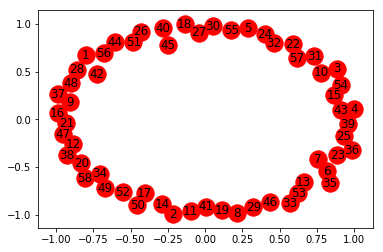

在网络中添加带权中的边...


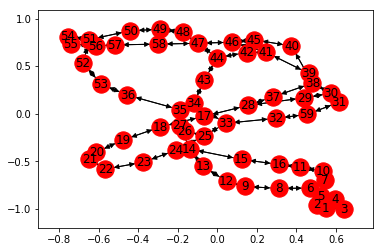

给网路设置布局...
画出网络图像：


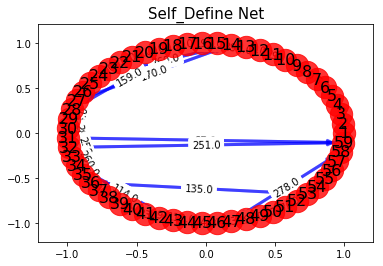

In [94]:

#自定义网络
# row=np.array([0,0,0,1,2,3,6])
# col=np.array([1,2,3,4,5,6,7])
# value=np.array([1,2,1,8,1,3,5])

# row=np.array([1,1,2,2,3,3,4,4,5,6,7,8,8,   2,9,3,9,4,10,5,6,6,7,8,9,10])
# col=np.array([2,9,3,9,4,10,5,6,6,7,8,9,10,1,1,2,2,3,3,4,4,5,6,7,8,8])
# value=np.array([4,4,1,4,4,1,3,8,1,2,2,1,3,4,4,1,4,4,1,3,8,1,2,2,1,3])



# for 


print('生成一个空的有向图')
G=nx.DiGraph()
print('为这个网络添加节点...')
for i in range(1,l.shape[0]):
    G.add_node(i)

nx.draw_networkx(G)
plt.show()
    
print('在网络中添加带权中的边...')
for r in range(l.shape[0]):
    for c in range(l.shape[1]):
        if l.iloc[r,c]>0:
            G.add_weighted_edges_from([(r+1,c+1,l.iloc[r,c])])

            
nx.draw_networkx(G)
plt.show()
        


print('给网路设置布局...')
pos=nx.shell_layout(G)


#把节点画出来  
nx.draw_networkx_nodes(G,pos,node_color='r',node_size=500,alpha=0.8) #显示每一个结点 
  
#把边画出来  
nx.draw_networkx_edges(G,pos,width=3.0,alpha=0.5,edge_color='b')  #显示每一条边
  
#把节点的标签画出来  
nx.draw_networkx_labels(G,pos,font_size=16)     #显示每一个结点上的数字


print('画出网络图像：')
# nx.draw(G,pos,with_labels=True, node_color='white', edge_color='red', node_size=400, alpha=0.5 )


#把边权重画出来  
edge_labels = nx.get_edge_attributes(G,'weight')    #获取每一条边的权重
nx.draw_networkx_edge_labels(G, pos, edge_labels)   #为图添加上权重

plt.title('Self_Define Net',fontsize=15)
plt.show()




In [95]:
# help(nx.dijkstra_path)

In [96]:
# G.remove_edge(4,10)#删除有向边3->10,反向边10->3仍然存在
# G.add_edge(*(4,10))#删除有向边3->10,反向边10->3仍然存在
###添加4-10路段测试使用

In [97]:
# #把节点画出来  
# nx.draw_networkx_nodes(G,pos,node_color='r',node_size=500,alpha=0.8) #显示每一个结点 
  
# #把边画出来  
# nx.draw_networkx_edges(G,pos,width=3.0,alpha=0.5,edge_color='b')  #显示每一条边
  
# #把节点的标签画出来  
# nx.draw_networkx_labels(G,pos,font_size=16)     #显示每一个结点上的数字


# print('画出网络图像：')
# # nx.draw(G,pos,with_labels=True, node_color='white', edge_color='red', node_size=400, alpha=0.5 )


# #把边权重画出来  
# edge_labels = nx.get_edge_attributes(G,'weight')    #获取每一条边的权重
# nx.draw_networkx_edge_labels(G, pos, edge_labels)   #为图添加上权重

# plt.title('Self_Define Net',fontsize=15)
# plt.show()


In [98]:
G.number_of_nodes()

59

In [99]:
G.number_of_edges()

138

In [100]:
'''
Shortest Path with dijkstra_path
'''
print('dijkstra方法寻找最短路径：')
source=3
target=45
path=nx.dijkstra_path(G, source=source, target=target)
print('节点{}到{}的路径：'.format(source,target), path)
print('dijkstra方法寻找最短距离：')
distance=nx.dijkstra_path_length(G, source=2, target=7)
print('节点{}到{}的距离为：'.format(source,target), distance)

dijkstra方法寻找最短路径：
节点3到45的路径： [3, 4, 5, 6, 8, 9, 12, 13, 14, 27, 26, 25, 33, 32, 59, 31, 30, 38, 40, 45]
dijkstra方法寻找最短距离：
节点3到45的距离为： 856.0


In [101]:
print('通用方法寻找最短路径：')
p=nx.shortest_path(G,source,target,'weight')
print('源节点{}，终点为{}：'.format(source,target), p)
distance=nx.shortest_path_length(G,source,target,'weight')
print('源节点为{}，终点为{},最短距离：'.format(source,target), distance)


通用方法寻找最短路径：
源节点3，终点为45： [3, 4, 5, 6, 8, 9, 12, 13, 14, 27, 26, 25, 33, 32, 59, 31, 30, 38, 40, 45]
源节点为3，终点为45,最短距离： 3922.0


In [102]:
print('通用方法寻找所有最短路径：')
all_shortest_path=nx.all_shortest_paths(G,source,target,'weight')
print('源节点{}，终点为{}：'.format(source,target), list(all_shortest_path))

通用方法寻找所有最短路径：
源节点3，终点为45： [[3, 4, 5, 6, 8, 9, 12, 13, 14, 27, 26, 25, 33, 32, 59, 31, 30, 38, 40, 45]]


In [103]:
##这里想到一个算法：就是对每辆车计算起点到终点的最短路径;
#    1.对第一辆车计算起点到终点的最短路径
#    2.计算每个经过路段的道路容量
#         如果存在道路容量超标，则将第一个超标的路段断开，重复步骤1，重复步骤2，直到找出满足道路容量的最短路径；
#         否则输出无解
#    3.恢复断开的路径，对剩余的车重复步骤1、2直到所有的车辆起点终点计算完毕

In [104]:
# res[(2,3)]=1

In [105]:
alpha=0.8

In [106]:
a=np.array([2,8,8,5])
max(a)

8

In [127]:
import math

def get_limited_shortest_path(index,car_times,start_end_tuple,car_type):   
    
#     for index,( s ,e) in enumerate(start_end_tuple_list):
#     print('start_end_tuple',type(start_end_tuple))
    s,e=start_end_tuple
    
    all_shortest_path=list(nx.all_shortest_paths(G,s,e,'weight'))
    #最短路径有多条时，选择节点数最少的那个最短路径
    if len( all_shortest_path)>1:
        len_min_index=np.argmin([len(each)for each in all_shortest_path])
        all_shortest_path_use=all_shortest_path[len_min_index]
    else:
        all_shortest_path_use=all_shortest_path[0]
        
    

    
    all_heavy_path['{}{}'.format(car_type,index+1)]=all_shortest_path_use
    
        
    print('{}{} 源节点{}，终点为{},最短路径为：{}'.format(car_type,index+1,s,e,all_shortest_path_use))
    distance=nx.shortest_path_length(G,s,e,'weight')
    print('{}{}源节点为{}，终点为{},最短距离：{}'.format(car_type,index+1,s,e, distance))
    pairs_list=list(zip(all_shortest_path_use,all_shortest_path_use[1:]))
    print('pairs_list={}\n'.format(pairs_list))
    ##计算每个路段道路通行能力
    ##第一辆车拉着第一种货物一次经过第一个、二个、等各个节点
    e0=E.iloc[index]
    q0=Q.iloc[index]
    c0=cap.iloc[index]
    q_div_c=q0/c0
    op=e0*math.ceil(q_div_c)

    for pair in pairs_list:
        ##已经使用的路段都是满足道路通行能力的   
        pair_index=tuple((int(each)-1 for each in pair))
        res_temp= op/(MSF.iloc[pair_index]*FHV.iloc[pair_index]*FD.iloc[pair_index]*FW.iloc[pair_index]*FF.iloc[pair_index])
        if res[pair_index]+res_temp<alpha:
#             print('res_temp={},pair_res={},pair_index={}'.format(res_temp,res[pair_index],pair_index))
            res[pair_index]+=res_temp
    
            if pair not in all_pairs_index_new.keys():
                all_pairs_index_new[pair]={}
                if car_type not in all_pairs_index_new[pair].keys():
                    all_pairs_index_new[pair][car_type]=[]
                    all_pairs_index_new[pair][car_type].append(index+1)
                else:
                    all_pairs_index_new[pair][car_type].append(index+1)
                    
                    
            else:   
                if car_type not in all_pairs_index_new[pair].keys():
                    all_pairs_index_new[pair][car_type]=[]
                    all_pairs_index_new[pair][car_type].append(index+1)
                else:
                    all_pairs_index_new[pair][car_type].append(index+1)
        
        
        
        
        else:
            #暂时删除该有项边，重新找最短路径，找到最短路径后在将有向边加上
            print('删除该路段 {}'.format(pair))
            print('res_temp={},pair_res={},pair_index={}\n'.format(res_temp,res[pair_index],pair_index))
            G.remove_edge(*pair)
            get_limited_shortest_path(index,start_end_tuple,car_type)
            print('添加该路段 {}\n'.format(pair))
            G.add_edge(*pair)

In [128]:
all_car_se={}
all_car_se['heavy']=list(zip(o1,d1))
all_car_se['light']=list(zip(o2,d2))

In [129]:
all_car_se

{'heavy': [(31, 48),
  (32, 58),
  (43, 45),
  (46, 32),
  (15, 8),
  (46, 43),
  (3, 8),
  (9, 3),
  (48, 3),
  (9, 3),
  (3, 9),
  (3, 9),
  (3, 9),
  (3, 9),
  (48, 3),
  (48, 3),
  (3, 48),
  (3, 48),
  (3, 48),
  (3, 8),
  (15, 32),
  (15, 43),
  (15, 26),
  (43, 31),
  (32, 3),
  (9, 3),
  (15, 32),
  (43, 3),
  (9, 3),
  (32, 3),
  (48, 3),
  (3, 26),
  (3, 32),
  (15, 43),
  (3, 43),
  (43, 3),
  (32, 46),
  (3, 43),
  (43, 46),
  (3, 32),
  (32, 46),
  (3, 32),
  (3, 43),
  (43, 46),
  (3, 43),
  (3, 32),
  (3, 32),
  (32, 46),
  (3, 43),
  (3, 43),
  (43, 46),
  (32, 46),
  (43, 46),
  (31, 8),
  (48, 8),
  (43, 8),
  (31, 26),
  (43, 26),
  (48, 26)],
 'light': [(48, 31),
  (58, 32),
  (45, 43),
  (32, 46),
  (8, 15),
  (43, 46),
  (8, 3),
  (3, 9),
  (3, 48),
  (3, 9),
  (9, 3),
  (9, 3),
  (9, 3),
  (9, 3),
  (3, 48),
  (3, 48),
  (48, 3),
  (48, 3),
  (48, 3),
  (8, 3),
  (32, 15),
  (43, 15),
  (26, 15),
  (31, 43),
  (3, 32),
  (3, 9),
  (32, 15),
  (3, 43),
  (3, 9),
 

In [130]:
import time

In [131]:
res=np.zeros((10,10))
all_heavy_path={}
all_pairs_index_new={}
# pair (2, 3) {'heavy': [1, 2]} 0.03879548100926288 True
# start_end_tuple_list=zip(o1,d1)
start=time.time()
for car_type,start_end_tuple_list in all_car_se.items():
    for index,( s ,e) in enumerate(start_end_tuple_list):
         #会计算最短路径，更新路段使用的容量
    #     print(*(s,e))
        start_end_tuple=(s,e)

        get_limited_shortest_path(index,start_end_tuple,car_type)
    #     break
# print('cost time:{}s'.format(time.time()-start))
##空车1

    

TypeError: get_limited_shortest_path() missing 1 required positional argument: 'car_type'

In [ ]:
res[2,3]

In [ ]:
res

In [ ]:
# all_heavy_path

In [ ]:
all_pairs_index_new

In [ ]:
res

In [ ]:
a=res
a=a+1

In [ ]:
a

In [ ]:
##寻找每辆重车的最短路径

In [ ]:
all_heavy_path={}
for index,( s ,e) in enumerate(zip(o1,d1)):
  
    all_shortest_path=list(nx.all_shortest_paths(G,s,e,'weight'))

    all_heavy_path[index+1]=all_shortest_path
    print('重车{} 源节点{}，终点为{},最短路径为：{}\n'.format(index+1,s,e,all_shortest_path))


In [ ]:
all_heavy_path

In [ ]:
all_light_path={}
for index, (s ,e) in enumerate(zip(o2,d2)):
  
    all_shortest_path=list(nx.all_shortest_paths(G,s,e,'weight'))
    print('空车{} 源节点{}，终点为{},最短路径为：{}\n'.format(index+1,s,e, all_shortest_path))
    all_light_path[index+1]=all_shortest_path

In [ ]:
all_light_path

In [ ]:
# 对每一个路段i,j都要保证经过该路段运输的所有物料的通行能力

In [ ]:
all_heavy_path_pair={}
all_heavy_pairs_index={}
all_heavy_pairs=[]
for index,each in all_heavy_path.items():
    all_heavy_path_pair[index]=[]
    for e in each :
        pair_list=list(zip(e,e[1:]))
        all_heavy_path_pair[index].append(pair_list)
#         all_heavy_pairs.extend(pair_list)
        for each_pair in pair_list:
            if each_pair not in all_heavy_pairs_index.keys():
                all_heavy_pairs_index[each_pair]={'heavy':[]}
                all_heavy_pairs_index[each_pair]['heavy'].append(index)
            else:
                all_heavy_pairs_index[each_pair]['heavy'].append(index)
            
        #目前多个最短路径先只用第一个
        break 


In [ ]:
all_heavy_pairs_index

In [ ]:
all_heavy_path_pair

In [ ]:
all_heavy_pairs_index

In [ ]:
# all_heavy_pairs_index[(2,3)]['light']=[]
# all_heavy_pairs_index[(2,3)]['light'].append(777)

In [ ]:
all_heavy_pairs_index

In [ ]:
all_light_path_pair={}
all_light_pairs_index=all_heavy_pairs_index
all_light_pairs=[]
for index,each in all_light_path.items():
    all_light_path_pair[index]=[]
    for e in each :
        pair_list=list(zip(e,e[1:]))
        all_light_path_pair[index].append(pair_list)
#         all_light_pairs.extend(pair_list)
        for each_pair in pair_list:
            if each_pair not in all_light_pairs_index.keys():
                all_light_pairs_index[each_pair]={}
                if 'light' not in all_light_pairs_index[each_pair].keys():
                    all_light_pairs_index[each_pair]['light']=[]
                    all_light_pairs_index[each_pair]['light'].append(index)
                else:
                    all_light_pairs_index[each_pair]['light'].append(index)
                    
            else:
# #                 all_light_pairs_index[each_pair]['light']=[]
#                 all_light_pairs_index[each_pair]['light'].append(index)
    
                if 'light' not in all_light_pairs_index[each_pair].keys():
                    all_light_pairs_index[each_pair]['light']=[]
                    all_light_pairs_index[each_pair]['light'].append(index)
                else:
                    all_light_pairs_index[each_pair]['light'].append(index)
            
        #目前多个最短路径先只用第一个
        break 

    

In [ ]:
all_light_path_pair

In [ ]:
all_light_pairs_index

In [ ]:
all_heavy_pairs_index

In [ ]:
# {(2, 3): {'heavy': [1, 2]},
#  (3, 4): {'heavy': [1, 4, 6, 7], 'light': [5]},
#  (4, 5): {'heavy': [1, 4, 6], 'light': [5]},
#  (3, 10): {'heavy': [2], 'light': [7]},
#  (10, 8): {'heavy': [2]},
#  (8, 7): {'heavy': [2, 3]},
#  (1, 9): {'heavy': [3]},
#  (9, 8): {'heavy': [3]},
#  (7, 6): {'heavy': [3]},
#  (6, 5): {'heavy': [3]},
 
#  (10, 3): {'heavy': [4, 7]},
#  (5, 4): {'heavy': [5], 'light': [1, 6]},####
#  (4, 3): {'heavy': [5], 'light': [1, 6, 7]},####
#  (3, 2): {'light': [1]},
#  (7, 8): {'light': [2, 3, 4]},####
#  (8, 9): {'light': [2, 3]},####
#  (9, 2): {'light': [2]},
#  (5, 6): {'light': [3, 4]},####
#  (6, 7): {'light': [3, 4]},####
#  (9, 1): {'light': [3]},
#  (8, 10): {'light': [4]}}

In [ ]:
##开始计算每个路段通行能力

In [ ]:
all_pairs_index=all_heavy_pairs_index

In [ ]:
# MSF*FHV*FD*FW*FF

In [ ]:
# l=pd.read_excel(path,'L（路段长）').iloc[:,1:]#,'B2:K11');  #读取各个路段长度
# a=pd.read_excel(path,'A（可达矩阵）').iloc[:,1:]#,'B2:K11');  #读取各路段间的可达矩阵（此处应当按照物料品类进行分类，案列假设7种物料可达矩阵一致）
# MSF=pd.read_excel(path,'MSF（最大服务交通量）').iloc[:,1:]#,'B2:K11');#读取路段的最大服务交通量
# FHV=pd.read_excel(path,'FHV（交通组成修正系数）').iloc[:,1:]#,'B2:K11');#读取交通组成修正系数
# FD=pd.read_excel(path,'FD（方向分布系数）').iloc[:,1:]#,'B2:K11');  #读取方向分布修正系数
# FW=pd.read_excel(path,'FW（宽度修正系数）').iloc[:,1:]#,'B2:K11');  #读取车道宽度、路肩宽度修正系数
# FF=pd.read_excel(path,'FF（路测干扰系数）').iloc[:,1:]#,'B2:K11');  #读取路测干扰修正系数

# o1=pd.read_excel(path,'K（物料）','C3:C9');  #读取重车起点
# d1=pd.read_excel(path,'K（物料）','D3:D9');  #读取重车终点
# o2=pd.read_excel(path,'K（物料）','J3:J9');  #读取空车起点
# d2=pd.read_excel(path,'K（物料）','K3:K9');  #读取空车终点
# c1=pd.read_excel(path,'K（物料）','H3:H9');  #读取重车成本
# c2=pd.read_excel(path,'K（物料）','I3:I9');  #读取空车成本
# E=pd.read_excel(path,'K（物料）','G3:G9');     #读取运输物料k的车辆的折算系数
# Q=pd.read_excel(path,'K（物料）','E3:E9');     #读取物料k运输量的集合
# cap=pd.read_excel(path,'K（物料）','F3:F9');   #读取运载物料k的车辆的最大装载量
# alpha=0.8; 



In [ ]:
# (2, 3) {'heavy': [1, 2]}
# (3, 4) {'heavy': [1, 4, 6, 7], 'light': [5]}
# (4, 5) {'heavy': [1, 4, 6], 'light': [5]}
# (3, 10) {'heavy': [2], 'light': [7]}

In [ ]:
E.head(20)

In [ ]:
e0=E.iloc[[1,3,5]].values

In [ ]:
q0=Q.iloc[[1,3,5]].values

In [ ]:
c0=cap.iloc[[1,3,5]].values

In [ ]:
import math

In [ ]:
e0

In [ ]:
q0

In [ ]:
e0*q0

In [ ]:
e0*np.array([ math.ceil(each ) for each in q0/c0])

In [ ]:
MSF.iloc[(2,3)]

In [ ]:
MSF

In [ ]:
import math
for pair,car_id in all_pairs_index.items():
#     if len(car_id)==1:#重车和空车只有一个经过该路段
        res=0
        for car,num in car_id.items():
#             res=0
            
            num_index=[each-1 for each in num]
            e0=E.iloc[num_index].values
            q0=Q.iloc[num_index].values
            c0=cap.iloc[num_index].values
            q_div_c=q0/c0
#             print('car',tuple(car))
            pair_index=tuple((int(each)-1 for each in pair))
#             print(tuple(pair_index))
            
            res+=sum(e0*np.array([math.ceil(each) for each in q_div_c]))/(
                MSF.iloc[pair_index]*FHV.iloc[pair_index]*FD.iloc[pair_index]*FW.iloc[pair_index]*FF.iloc[pair_index])
            
        print('pair',pair,car_id,res,res<0.8)
                
        pass
#     elif len(car_id)==2:#重车和轻车都要经过该路段
#             pass
#     print(pair,car_id)

In [ ]:
# pair (2, 3) {'heavy': [1, 2]} 0.03879548100926288 True
# pair (3, 4) {'heavy': [1, 4, 6, 7], 'light': [5]} 0.13966373163334636 True
# pair (4, 5) {'heavy': [1, 4, 6], 'light': [5]} 0.12026599112871492 True
# pair (3, 10) {'heavy': [2], 'light': [7]} 0.03879548100926288 True
# pair (10, 8) {'heavy': [2]} 0.01939774050463144 True
# pair (8, 7) {'heavy': [2, 3]} 0.0969887025231572 True
# pair (1, 9) {'heavy': [3]} 0.07759096201852576 True
# pair (9, 8) {'heavy': [3]} 0.07759096201852576 True
# pair (7, 6) {'heavy': [3]} 0.07759096201852576 True
# pair (6, 5) {'heavy': [3]} 0.07759096201852576 True
# pair (10, 3) {'heavy': [4, 7]} 0.0969887025231572 True
# pair (5, 4) {'heavy': [5], 'light': [1, 6]} 0.04267502911018917 True
# pair (4, 3) {'heavy': [5], 'light': [1, 6, 7]} 0.06207276961482061 True
# pair (3, 2) {'light': [1]} 0.01939774050463144 True
# pair (7, 8) {'light': [2, 3, 4]} 0.17457966454168294 True
# pair (8, 9) {'light': [2, 3]} 0.0969887025231572 True
# pair (9, 2) {'light': [2]} 0.01939774050463144 True
# pair (5, 6) {'light': [3, 4]} 0.15518192403705153 True
# pair (6, 7) {'light': [3, 4]} 0.15518192403705153 True
# pair (9, 1) {'light': [3]} 0.07759096201852576 True
# pair (8, 10) {'light': [4]} 0.07759096201852576 True

In [ ]:
temp=np.array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.07759096, 0.        ],
       [0.        , 0.        , 0.03879548, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.01939774, 0.        , 0.13966373, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.03879548],
       [0.        , 0.        , 0.06207277, 0.        , 0.12026599,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.04267503, 0.        ,
        0.15518192, 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.07759096,
        0.        , 0.15518192, 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.07759096, 0.        , 0.17457966, 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.0969887 , 0.        , 0.0969887 , 0.07759096],
       [0.07759096, 0.01939774, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.07759096, 0.        , 0.        ],
       [0.        , 0.        , 0.0969887 , 0.        , 0.        ,
        0.        , 0.        , 0.01939774, 0.        , 0.        ]])


In [ ]:
temp2=np.array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.07759096, 0.        ],
       [0.        , 0.        , 0.03879548, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.01939774, 0.        , 0.13966373, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.03879548],
       [0.        , 0.        , 0.06207277, 0.        , 0.12026599,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.04267503, 0.        ,
        0.15518192, 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.07759096,
        0.        , 0.15518192, 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.07759096, 0.        , 0.17457966, 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.0969887 , 0.        , 0.0969887 , 0.07759096],
       [0.07759096, 0.01939774, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.07759096, 0.        , 0.        ],
       [0.        , 0.        , 0.0969887 , 0.        , 0.        ,
        0.        , 0.        , 0.01939774, 0.        , 0.        ]])

In [ ]:
temp==temp2

In [ ]:
temp[1,2]

In [ ]:
temp[2,3]

In [ ]:
temp[3,4]

In [ ]:
temp[7,9]

In [ ]:
# 题目要求：	a说我不是小偷；b说c是小偷；c说小偷肯定是d；d说c胡说！

# 实现功能：判断小偷是谁

def thief_is():
    for thief in ('a', 'b', 'c', 'd'):
        sum = ('a' != thief) + (thief == 'c') + \
            (thief == 'd') + (thief != 'd')
        ##一个小偷，三个说真话的，加起来是三
        if sum == 3:
            print("thief is %s"%thief)
thief_is()


In [ ]:
for honest in ('baobao','xingxing','lele','qiangqiang'):
    sum=()

In [ ]:
G=nx.Graph()
G.add_path([0,1,2])
G.add_path([0,10,2])
print([p for p in nx.all_shortest_paths(G,source=0,target=2)])

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
 
G = nx.Graph()
Matrix = np.array(
    [
        [0, 1, 1, 1, 1, 1, 0, 0],  # a
        [0, 0, 1, 0, 1, 0, 0, 0],  # b
        [0, 0, 0, 1, 0, 0, 0, 0],  # c
        [0, 0, 0, 0, 1, 0, 0, 0],  # d
        [0, 0, 0, 0, 0, 1, 0, 0],  # e
        [0, 0, 1, 0, 0, 0, 1, 1],  # f
        [0, 0, 0, 0, 0, 1, 0, 1],  # g
        [0, 0, 0, 0, 0, 1, 1, 0]  # h
    ]
)
for i in range(len(Matrix)):
    for j in range(len(Matrix)):
#         G.add_edge(i, j)
        G.add_weighted_edges_from([(row[i],col[i],value[i])])
 
nx.draw(G)
plt.show()


In [ ]:
from matplotlib import pyplot as plt
import networkx as nx
G=nx.Graph()
G.add_nodes_from([1,2,3])
G.add_edges_from([(1,2),(1,3)])
nx.draw_networkx(G)
plt.show()

In [77]:

import pandas as pd

In [82]:
data=({'来源单元':'炼焦厂_1','到达单元':'炼铁5','物质量':121.42,'物质名称':'焦炭'},
                   {'来源单元':'新炼钢','到达单元':'窄带','物质量':65.47,'物质名称':'钢坯'},
                   {'来源单元':'老炼钢','到达单元':'三棒','物质量':58.8,'物质名称':'钢坯'},
     )

In [83]:
df=pd.DataFrame(data)

In [87]:
df.sample(df.shape[0])

,到达单元,来源单元,物质名称,物质量
0,炼铁5,炼焦厂_1,焦炭,121.42
1,窄带,新炼钢,钢坯,65.47
2,三棒,老炼钢,钢坯,58.80
